# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df=pd.read_csv("diabetes.csv")

# accuracy : doğru bildiklerinizin tüm tahminlere oranı
recall (sensitivity) : 1'lerin yüzde kaçını bildiğiniz
specifity : 0'ların yüzde kaçını bildiğiniz
precision : 1 dediklerinizin yüzde kaçı doğru
f1 score : recall ve precision'ın harmonik ortalaması 2*(p*r/p+r)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [4]:
df.shape

(768, 9)

## Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

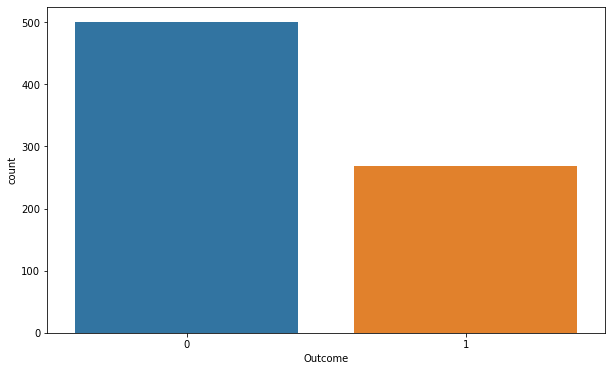

In [8]:
sns.countplot(df.Outcome)

<AxesSubplot:xlabel='Pregnancies'>

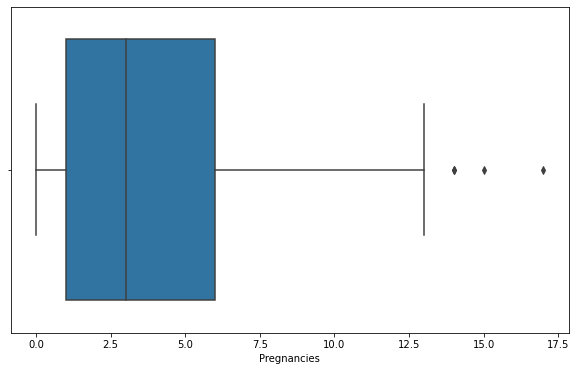

In [9]:
sns.boxplot(df.Pregnancies)

In [10]:
df=df[df.Pregnancies<13]

<AxesSubplot:xlabel='Pregnancies'>

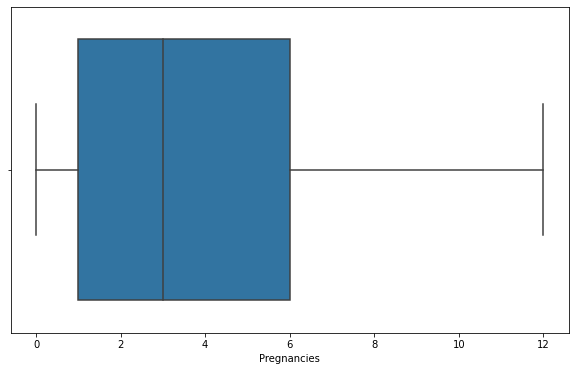

In [11]:
sns.boxplot(df.Pregnancies)

<AxesSubplot:xlabel='SkinThickness'>

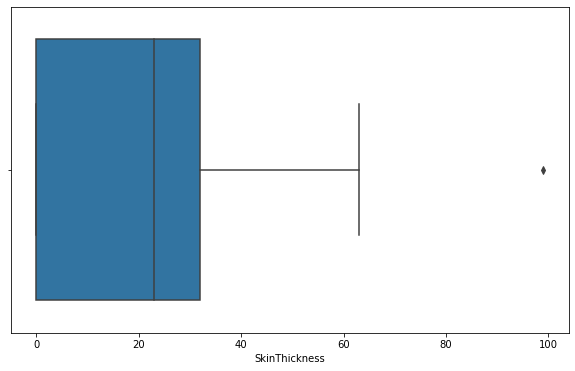

In [12]:
sns.boxplot(df.SkinThickness)

In [13]:
df=df[df.SkinThickness<70]

<AxesSubplot:xlabel='SkinThickness'>

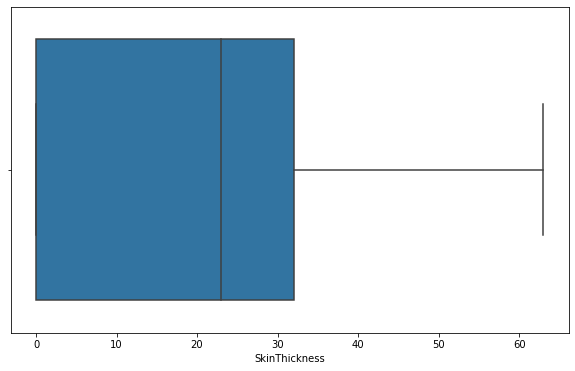

In [14]:
sns.boxplot(df.SkinThickness)

<AxesSubplot:xlabel='Insulin'>

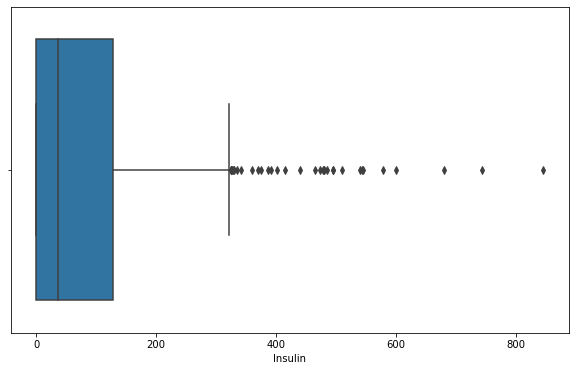

In [15]:
sns.boxplot(df.Insulin)

<AxesSubplot:xlabel='Glucose'>

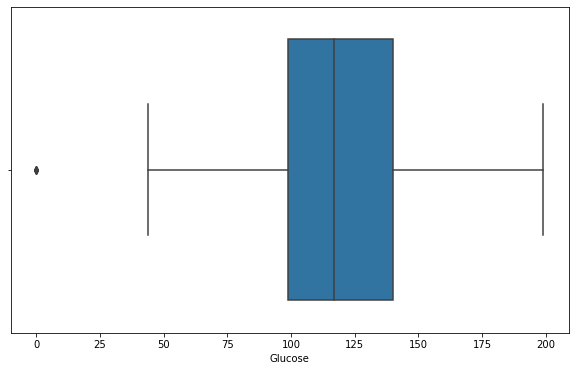

In [16]:
sns.boxplot(df.Glucose)

In [17]:
df=df[df.Glucose>0]

<AxesSubplot:xlabel='Glucose'>

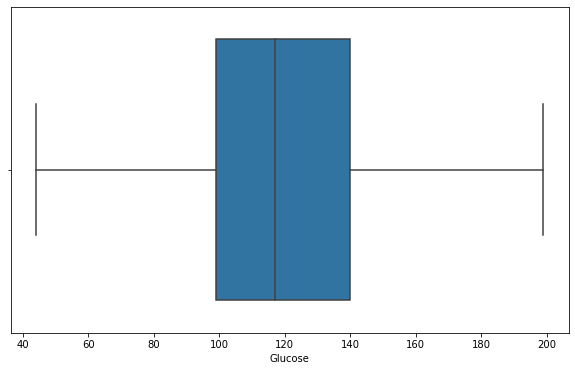

In [18]:
sns.boxplot(df.Glucose)

<AxesSubplot:xlabel='BloodPressure'>

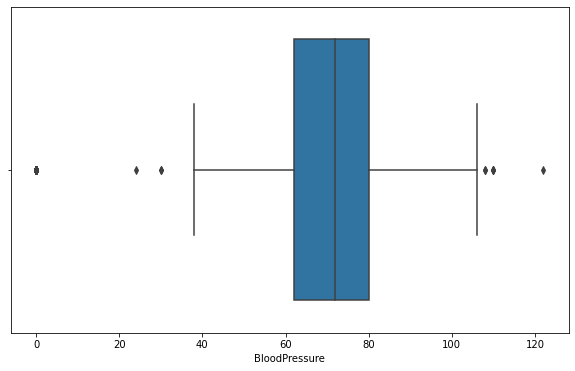

In [19]:
sns.boxplot(df.BloodPressure)

In [20]:
df=df[df.BloodPressure>35]

<AxesSubplot:xlabel='BloodPressure'>

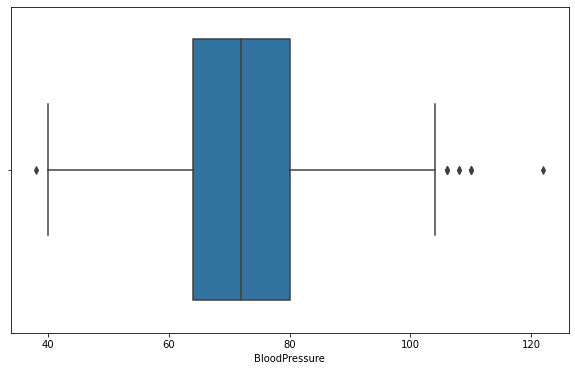

In [21]:
sns.boxplot(df.BloodPressure)

<AxesSubplot:xlabel='BMI'>

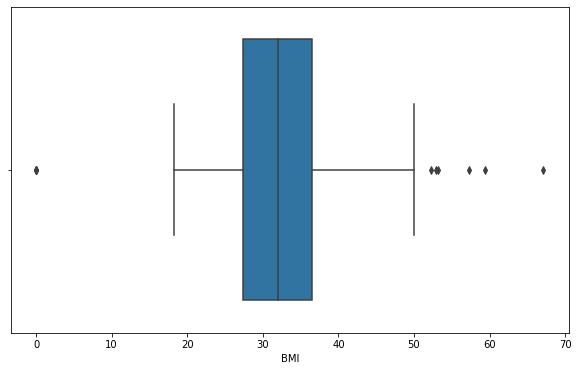

In [22]:
sns.boxplot(df.BMI)

In [23]:
df=df[df.BMI>0]

<AxesSubplot:xlabel='BMI'>

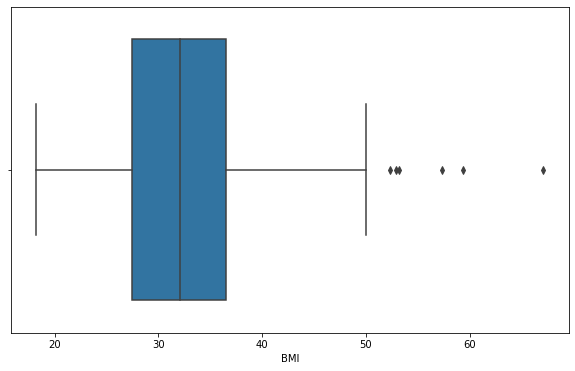

In [24]:
sns.boxplot(df.BMI)

In [25]:
df.shape

(707, 9)

In [26]:
df.Outcome.value_counts()

0    468
1    239
Name: Outcome, dtype: int64

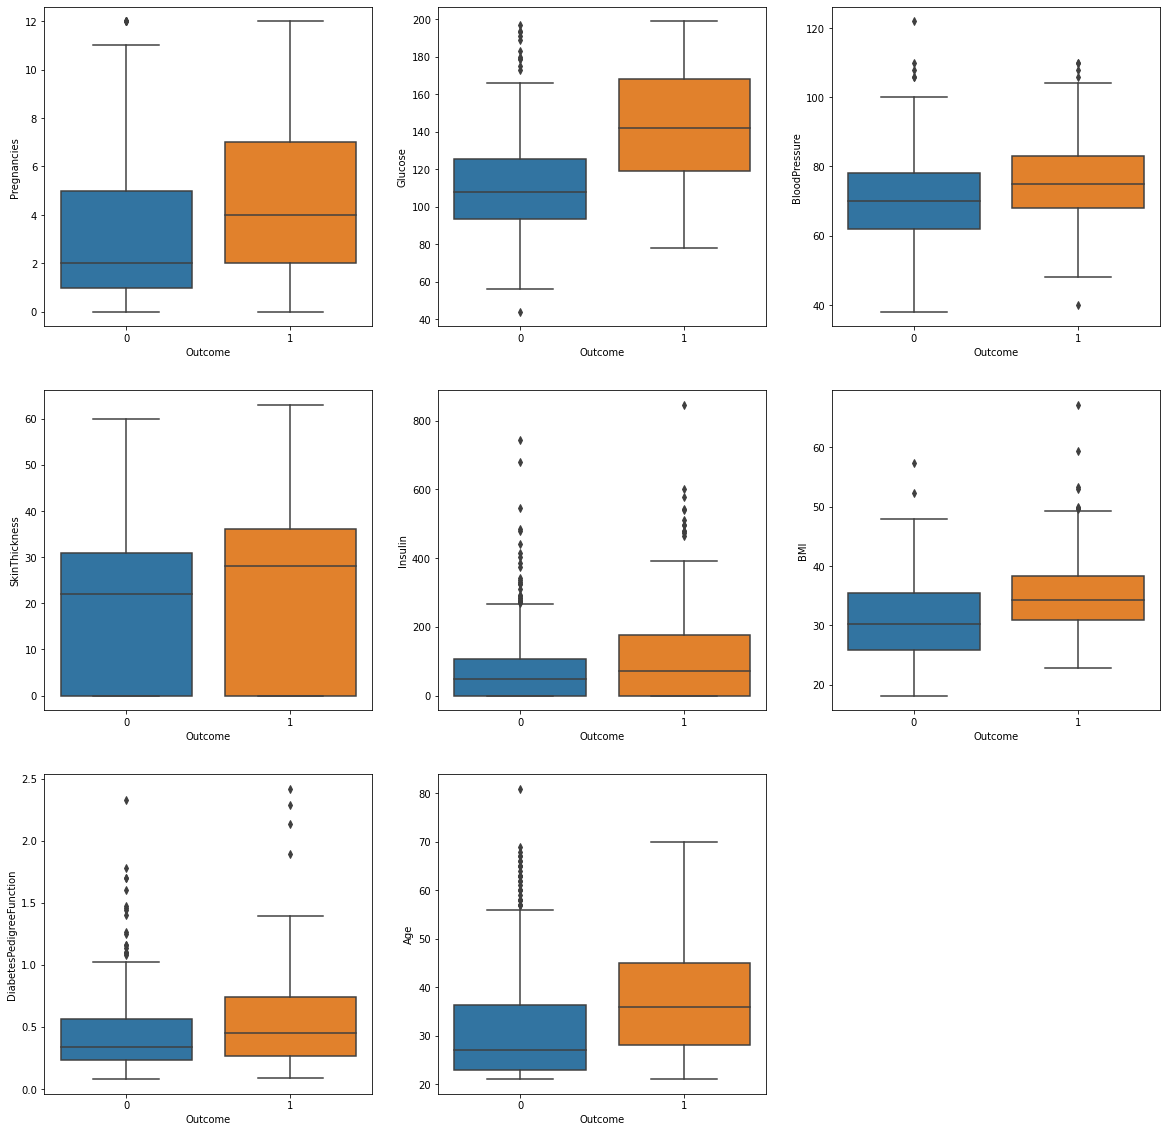

In [27]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)

<AxesSubplot:>

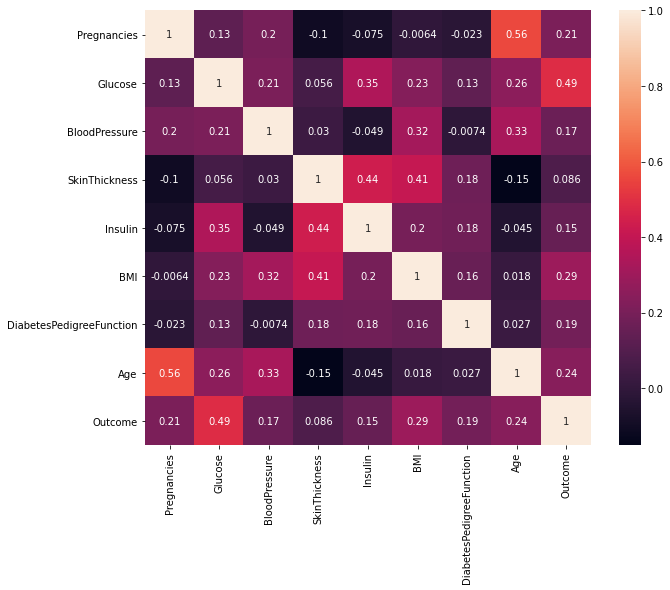

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

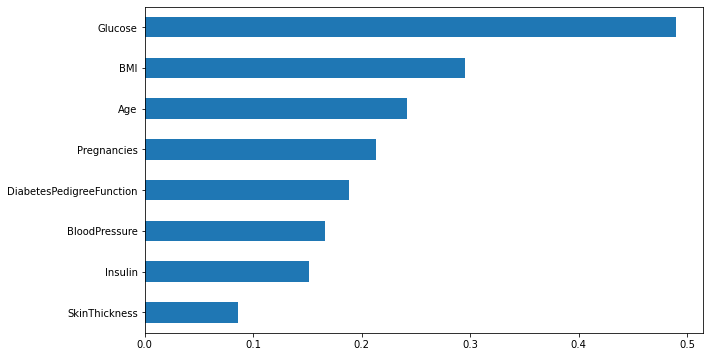

In [29]:
# df.corr()
# df.corr()["Outcome"].sort_values().plot.barh()
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()

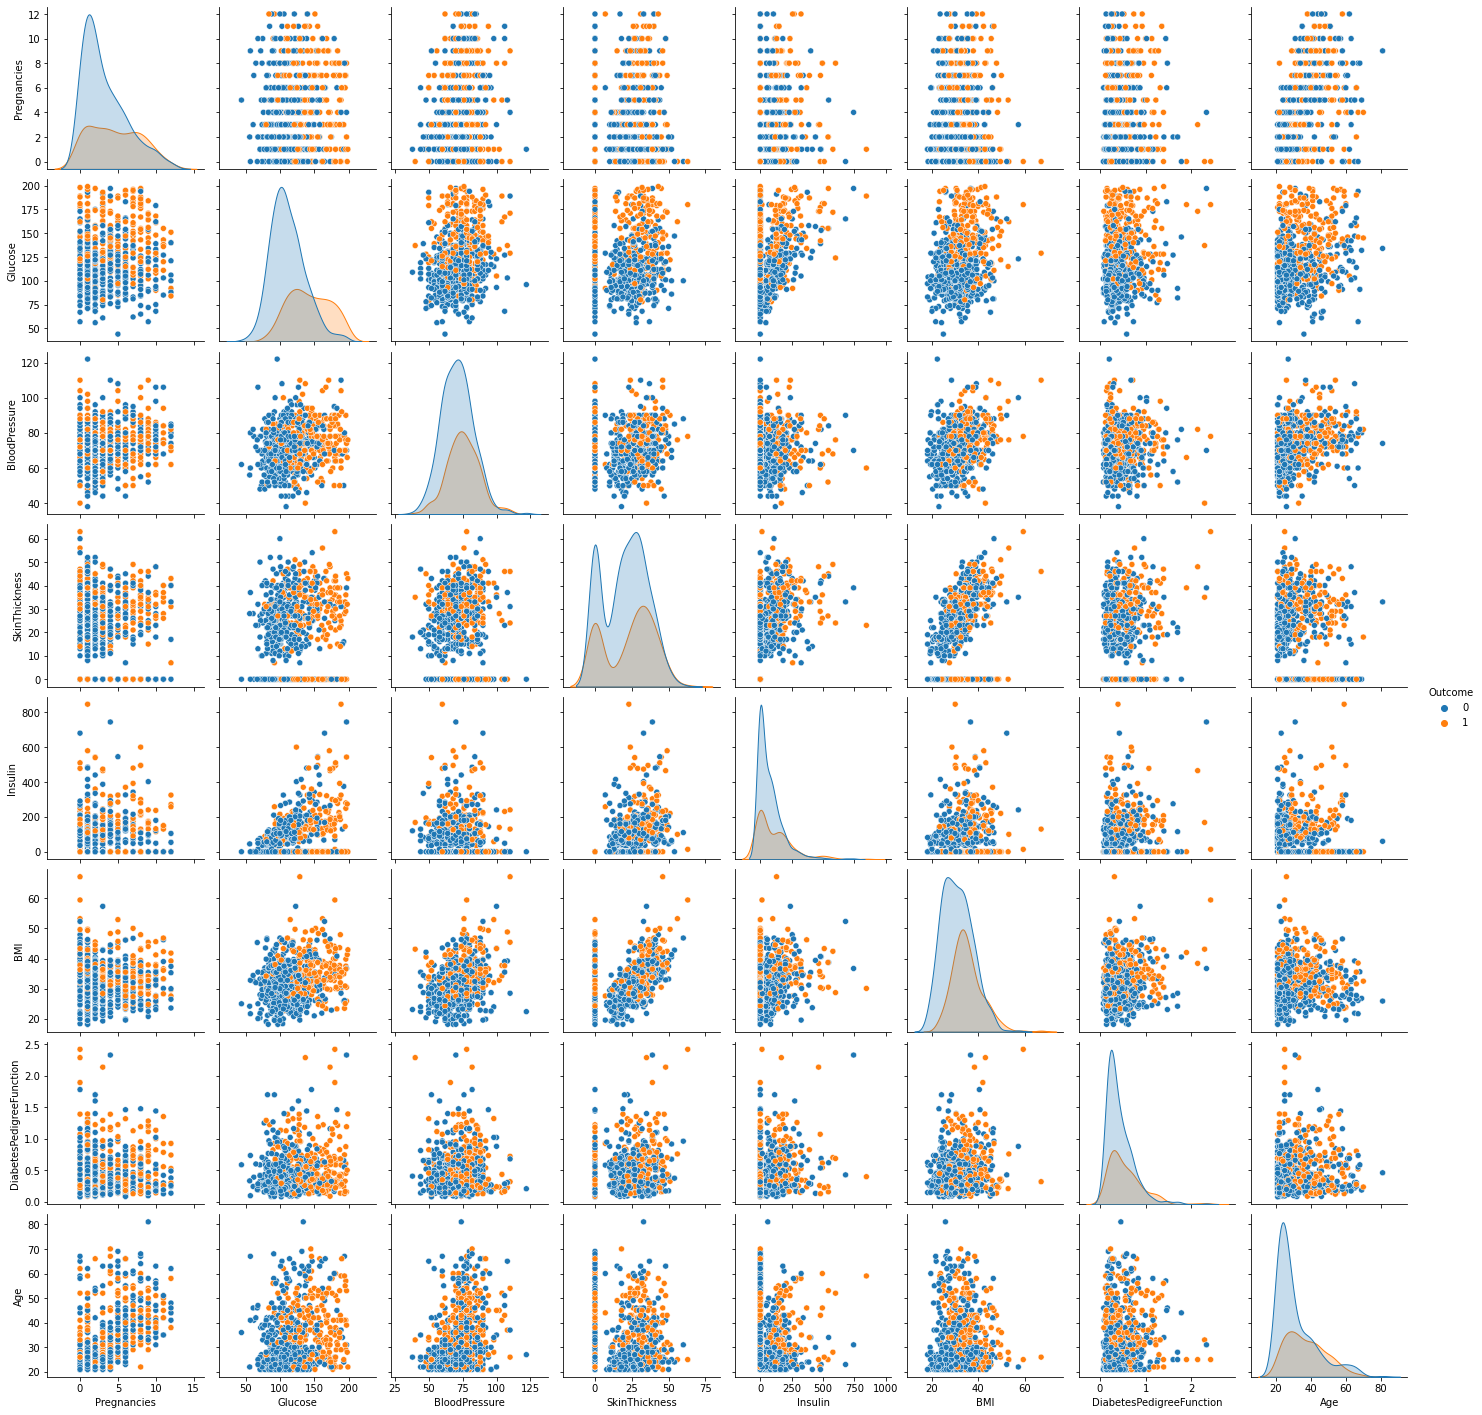

In [30]:
sns.pairplot(df, hue = "Outcome")

## Train | Test Split and Scaling

In [76]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
scaler = StandardScaler()

:alert-siren: fit işlemi train datası içerisindeki verilerin hepsine bakıyor, tüm sütunlara tek tek bakıyor. seçtiğinizi scaler tipi ne ise (std, max, min.. her ne ise) o değerleri bir kenara yazıyor.
Sonra transform dediinizde fit ile aldığınız değerler üzerinden X_train datasını dönüştürüyor. (Zaten onu X_train_scaled diye ayrı bir değişkene atıyoruz ve öyle devam ediyoruz)
Test datasının hiç bir referans noktasını, hiç bir bölümünü modelimin görmemesi gerekir. o yüzden test datasına hiç bir şekilde fit işlemini uygulamıyoruz.

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 fit işlemi train datamıza bişey yapmıyor, Sadece o data daki bazı referans noktalarını alıyor.
 Satandart scale refrans olarak mean ve std yi alıyor
 Minmax scaler refrans olarak minimum ve maksimum değerleri alıyor
 transform da ise aldığı referans değerlerini kullanarak transform işlemi yapıyor

## Modelling

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
log_model=LogisticRegression(class_weight = "balanced")
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data

In [98]:
#log_model=LogisticRegression(class_weight = "balanced")

In [101]:
log_model.fit(X_train_scaled, y_train) # eğitildi.

LogisticRegression(class_weight='balanced')

In [102]:
y_pred=log_model.predict(X_test_scaled) # tahmine geçtik

In [103]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [104]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
36,11,138,76,0,0,33.200,0.420,35,0,1,0.804
763,10,101,76,48,180,32.900,0.171,63,0,0,0.434
372,0,84,64,22,66,35.800,0.545,21,0,0,0.137
271,2,108,62,32,56,25.200,0.128,21,0,0,0.096
99,1,122,90,51,220,49.700,0.325,31,1,1,0.652
95,6,144,72,27,228,33.900,0.255,40,0,1,0.672
315,2,112,68,22,94,34.100,0.315,26,0,0,0.278
79,2,112,66,22,0,25.000,0.307,24,0,0,0.144
57,0,100,88,60,110,46.800,0.962,31,0,1,0.564
559,11,85,74,0,0,30.100,0.300,35,0,0,0.268


## Model Performance on Classification Tasks

In [105]:
from sklearn.metrics import confusion_matrix, classification_report

1 skorlarım 0 a göre düşük. neden? çünkü elimdeki datamda 1 değerleri daha az. bu yüzden öğrenmesi kötü olmuş. 0 ile ilgili daha fazla  soru çözmüş daha çok çalışmış o yüzden 0'ı daha iyi öğrenmiş ve sonuç olarak 0 değerleri daha yüksek

In [94]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#sol üst= confusion
# sağ alt classification
# 468 tane 0 lar iyi çok veri var. 239 tane 1 ler az eğitemedik tam olarak
# 1 değerlerim target sütununda az olduğu için model 1 ler için iyi eğitilemedi, değerler % 60 larda
# Ancak target sütununda 0 lar fazla olduğu için model iyi eğitildi, değerler % 85 lerde

[[109  16]
 [ 19  33]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       125
           1       0.67      0.63      0.65        52

    accuracy                           0.80       177
   macro avg       0.76      0.75      0.76       177
weighted avg       0.80      0.80      0.80       177



balanced yaparak tekrar çalıştırdık. aşağıyı

 Sağlık verileri genellikle unbalance dır. Hasta olmayan birine hasta demek veya hasta birine hasta değilsin demek sıkıntılı bir durum olur
Recall değerlerimiz gerçkete hasta olan kaç kişiye hasta dedik. Bu değer unbalance verilerde önemlidir

Recall i artırmaya çalışıyorum. diğerlerinden feragat ettim.
Bir sınıflandırıcının tüm olumlu örnekleri bulma yeteneğidir. Her sınıf için gerçek pozitiflerin; gerçek pozitifler ve yanlış negatifler toplamına oranı olarak tanımlanır.

Doğru tanımlanmış pozitiflerin oranı. Recall = TP/(TP+FN)

In [106]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[93 32]
 [13 39]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.81       125
           1       0.55      0.75      0.63        52

    accuracy                           0.75       177
   macro avg       0.71      0.75      0.72       177
weighted avg       0.78      0.75      0.75       177



In [44]:
# scores with "class_weight = "balanced""
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[93 32]
 [13 39]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.81       125
           1       0.55      0.75      0.63        52

    accuracy                           0.75       177
   macro avg       0.71      0.75      0.72       177
weighted avg       0.78      0.75      0.75       177



## Cross Validate

In [107]:
from sklearn.model_selection import cross_validate

:alert-siren: hasta olanlara sen hastasın demek önemli. Bu recall değeridir ( 1 olanların 1 olduğunu bilebilmek) 
hasta olmayan birine hastasın demek çok büyük problem yaratmaz ama hasta olan birinin hasta olmadığını bulmak o hastayı kaybettirir.
Dolayısıyla yukarda da benim için önemli olan Recall dedim ve Recall değerini arttırmak için yukradaki işlemleri yaptım.
ve diğer değerlerden feragat etsem de recall değerini 0.75'e yükselttim.
cv = 5 yazsak muhtemel daha da düşecekti

In [110]:
model = LogisticRegression(class_weight = "balanced")

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
#df_scores
df_scores.mean()[2:]

test_accuracy    0.743
test_precision   0.621
test_recall      0.689
test_f1          0.651
dtype: float64

:alert-siren: cross validate yaparken datamdan bir miktar (test) veri çıkartıp öyle ölçümler yaptığım için data sayısı azaldığından skorlarda biraz (bazen birkaç puan) azalma olabilir. küçük datalarda bunu daha fazla hissederiz. ama önemli olan cross val. skoru ile ilkel skorumu kıyaslamak ve onu doğrulamak olduğu için problem yok.

recall-1 hasta olanları bulma oranımızdır. bizim için hedef hasta olanları  bulmak olduğu için recall-1 için diğer scorlardan feragat ediyoruz.

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7e

In [47]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

:alert-siren:FALSE POSITIVE RATE:
Bilemediğim 0 değerlerinin tüm 0 değerlerine oranı. (edited) 
Benim bilebildiğim 1 ler ne kadar fazla ve bilemediğim 0 lar ne kadar az ise o zaman skorum o kadar yüksektir. o yüzden bu curve ne kadar sol üst köşe noktasına yaklaşırsa benim modelimin gücü o kadar iyi demektir.
Positive: 1 dediklerim,
True:bildiklerim,
False:bilemediklerim.
True positive: Positive olarak tahmin ettiğim ve bildiğim veriler
False positive: Positive olarak tahmin ettiğim ve yanıldığım veriler.
benim 1 deyip bildiklerim gerçekte 1 olanların yüzde kaçı? 

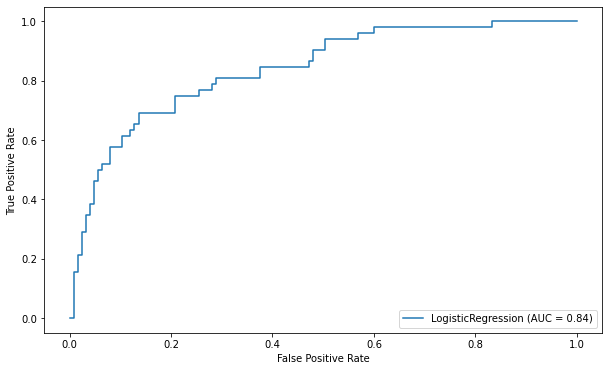

In [48]:
plot_roc_curve(log_model, X_test_scaled, y_test);

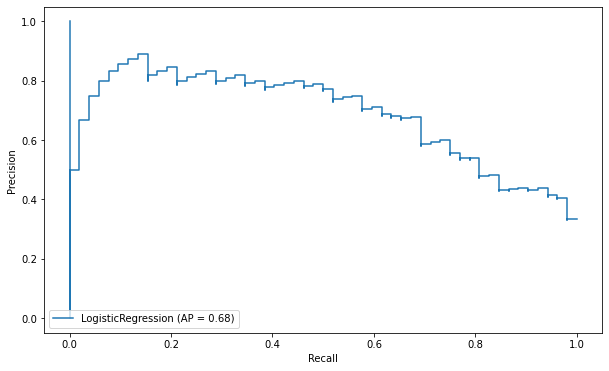

In [49]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);
# dengesiz data varsa, alan ne kadr büyükse o kadar iyi
# Bizim datamız unbalance ise biz ROC curve yerine precision-recall curve'ye bakmamız gerekir

dengesizlerde buna bakılır YUKARIDAKİ

## Finding Best Threshold

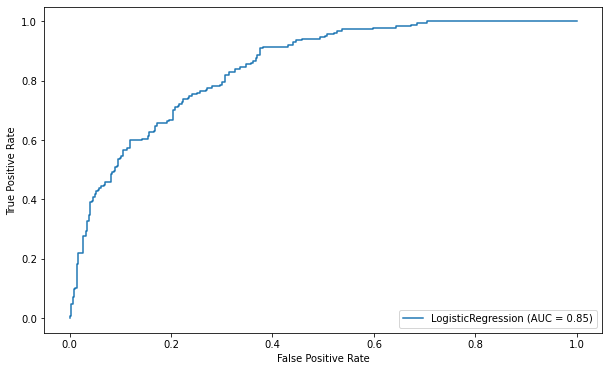

In [111]:
plot_roc_curve(log_model, X_train_scaled, y_train);
#sol üst köşeye en yakını almaya çalışıyoruz.
#Benim bilebildiğim 1 ler ne kadar fazla ve bilemediğim 0 lar ne kadar az ise o zaman skorum o kadar yüksektir. o yüzden bu curve ne 
#kadar sol üst köşe noktasına yaklaşırsa benim modelimin gücü o kadar iyi demektir.

In [112]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

0.8455278215182177

In [52]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [113]:
fp_rate

array([0.        , 0.        , 0.00291545, 0.00291545, 0.0058309 ,
       0.0058309 , 0.00874636, 0.00874636, 0.01166181, 0.01166181,
       0.01457726, 0.01457726, 0.01749271, 0.01749271, 0.02623907,
       0.02623907, 0.03206997, 0.03206997, 0.03498542, 0.03498542,
       0.03790087, 0.03790087, 0.04081633, 0.04081633, 0.04373178,
       0.04373178, 0.04664723, 0.04664723, 0.04956268, 0.04956268,
       0.05247813, 0.05247813, 0.05539359, 0.05539359, 0.05830904,
       0.05830904, 0.06122449, 0.06122449, 0.06705539, 0.06705539,
       0.06997085, 0.06997085, 0.08163265, 0.08163265, 0.0845481 ,
       0.0845481 , 0.08746356, 0.08746356, 0.09037901, 0.09037901,
       0.09329446, 0.09329446, 0.09620991, 0.09620991, 0.09912536,
       0.09912536, 0.10204082, 0.10204082, 0.10495627, 0.10495627,
       0.11370262, 0.11370262, 0.11953353, 0.11953353, 0.14285714,
       0.14285714, 0.15451895, 0.15451895, 0.1574344 , 0.1574344 ,
       0.16618076, 0.16618076, 0.16909621, 0.16909621, 0.17201

In [114]:
tp_rate

array([0.        , 0.00534759, 0.00534759, 0.04812834, 0.04812834,
       0.06951872, 0.06951872, 0.09625668, 0.09625668, 0.10160428,
       0.10160428, 0.18181818, 0.18181818, 0.21925134, 0.21925134,
       0.27807487, 0.27807487, 0.29411765, 0.29411765, 0.32620321,
       0.32620321, 0.34759358, 0.34759358, 0.39037433, 0.39037433,
       0.39572193, 0.39572193, 0.40641711, 0.40641711, 0.4171123 ,
       0.4171123 , 0.42780749, 0.42780749, 0.43315508, 0.43315508,
       0.43850267, 0.43850267, 0.44385027, 0.44385027, 0.44919786,
       0.44919786, 0.45989305, 0.45989305, 0.48663102, 0.48663102,
       0.49197861, 0.49197861, 0.4973262 , 0.4973262 , 0.50802139,
       0.50802139, 0.51336898, 0.51336898, 0.53475936, 0.53475936,
       0.54010695, 0.54010695, 0.54545455, 0.54545455, 0.56684492,
       0.56684492, 0.57219251, 0.57219251, 0.59893048, 0.59893048,
       0.60427807, 0.60427807, 0.61497326, 0.61497326, 0.62566845,
       0.62566845, 0.63101604, 0.63101604, 0.64705882, 0.64705

In [115]:
thresholds

array([0.16073209, 0.16261603, 0.16265717, 0.16334441, 0.16453947,
       0.16464281, 0.16484761, 0.16500877, 0.16523584, 0.16545997,
       0.16701825, 0.16714804, 0.16763499, 0.16901984, 0.17197582,
       0.17269709, 0.17324538, 0.17350424, 0.1766504 , 0.17755494,
       0.17891297, 0.18002739, 0.18164365, 0.18169158, 0.18200005,
       0.18340035, 0.1834203 , 0.18385998, 0.1842206 , 0.18642301,
       0.18945178, 0.18948461, 0.19249028, 0.19309389, 0.19375031,
       0.19447129, 0.1955925 , 0.19585307, 0.19610136, 0.19649879,
       0.2013545 , 0.20241365, 0.20403565, 0.20607699, 0.20636254,
       0.20858419, 0.20862477, 0.20976103, 0.21109371, 0.21441095,
       0.21496964, 0.21641023, 0.21708773, 0.21739124, 0.21754422,
       0.21851158, 0.21934873, 0.22075598, 0.22152992, 0.22280612,
       0.22313762, 0.22364948, 0.2240744 , 0.22738896, 0.22848725,
       0.2298171 , 0.2322888 , 0.23243734, 0.2340412 , 0.23516461,
       0.23699401, 0.23860412, 0.24219246, 0.24397154, 0.24399

In [53]:
optimal_idx = np.argmax(tp_rate - fp_rate) # en iyi noktayı aldık
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.3435388882710482

In [54]:
test_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
524,3,125,58,0,0,31.600,0.151,24,0,0,0.345
94,2,142,82,18,64,24.700,0.761,21,0,0,0.428
90,1,80,55,0,0,19.100,0.258,21,0,0,0.025
228,4,197,70,39,744,36.700,2.329,31,0,1,0.990
351,4,137,84,0,0,31.200,0.252,30,0,1,0.503


In [55]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold else 0)
# ekleme yaptık pred 2 ile thresholdu değiştirince

In [56]:
test_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba,pred2
524,3,125,58,0,0,31.600,0.151,24,0,0,0.345,1
94,2,142,82,18,64,24.700,0.761,21,0,0,0.428,1
90,1,80,55,0,0,19.100,0.258,21,0,0,0.025,0
228,4,197,70,39,744,36.700,2.329,31,0,1,0.990,1
351,4,137,84,0,0,31.200,0.252,30,0,1,0.503,1


In [57]:
y_pred2 = test_data["pred2"]

y_pred ile olan skorlara baktığımda pred-2 yani best threshold ile aldığım değerlerde 1 lerin recall değerinin yükseldiğini gördüm. 
burada (hastaları yakalama adına)  önemli olan 1 değeri o yüzden 0 skorunun düşmesi önemli değil.

In [58]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[70 55]
 [ 8 44]]
              precision    recall  f1-score   support

           0       0.90      0.56      0.69       125
           1       0.44      0.85      0.58        52

    accuracy                           0.64       177
   macro avg       0.67      0.70      0.64       177
weighted avg       0.76      0.64      0.66       177



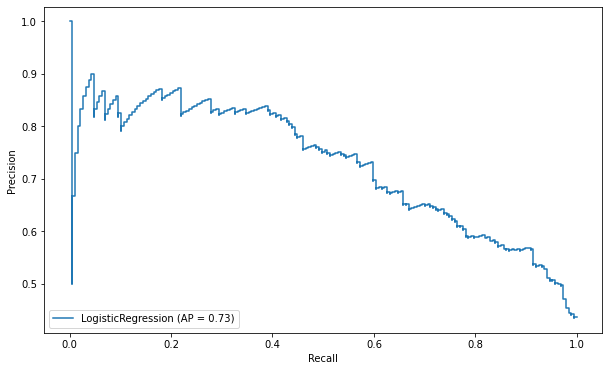

In [59]:
plot_precision_recall_curve(log_model, X_train_scaled, y_train);

In [60]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.7260867629538448

In [61]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [62]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.3435388882710482

## Final Model and Model Deployment

In [116]:
scaler = StandardScaler().fit(X)

In [117]:
import pickle
pickle.dump(scaler, open("scaler_diabates", 'wb'))

In [118]:
X_scaled = scaler.transform(X)

In [119]:
final_model = LogisticRegression(class_weight = "balanced").fit(X_scaled, y)

In [120]:
pickle.dump(final_model, open("final_model_diabates", 'wb'))

In [121]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,707.000,3.702,3.121,0.000,1.000,3.000,6.000,12.000
Glucose,707.000,121.734,30.657,44.000,99.000,117.000,141.000,199.000
BloodPressure,707.000,72.481,12.012,38.000,64.000,72.000,80.000,122.000
SkinThickness,707.000,21.296,15.422,0.000,0.000,24.000,33.000,63.000
Insulin,707.000,85.262,117.940,0.000,0.000,49.000,133.500,846.000
BMI,707.000,32.372,6.847,18.200,27.400,32.100,36.500,67.100
DiabetesPedigreeFunction,707.000,0.476,0.334,0.078,0.245,0.378,0.630,2.420
Age,707.000,33.139,11.729,21.000,24.000,29.000,40.000,81.000


In [122]:
my_dict = {"Pregnancies": [3, 6, 5],
           "Glucose": [117, 140, 120],
           "BloodPressure": [72, 80, 75],
           "SkinThickness": [23, 33, 25],
           "Insulin": [48, 132, 55],
           "BMI": [32, 36.5, 34],
           "DiabetesPedigreeFunction": [0.38, 0.63, 0.45],
           "Age": [29, 40, 33]
          }

In [123]:
sample = pd.DataFrame(my_dict)
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,117,72,23,48,32.000,0.380,29
1,6,140,80,33,132,36.500,0.630,40
2,5,120,75,25,55,34.000,0.450,33


In [124]:
scaler_diabates = pickle.load(open("scaler_diabates", "rb"))

In [125]:
sample_scaled = scaler_diabates.transform(sample)
sample_scaled

array([[-0.22495888, -0.15452894, -0.04006354,  0.11059814, -0.31615997,
        -0.0543865 , -0.28684307, -0.35310219],
       [ 0.73701246,  0.59623148,  0.62640516,  0.75950177,  0.3965681 ,
         0.60327464,  0.46316082,  0.58540625],
       [ 0.41635535, -0.05660367,  0.20986223,  0.24037887, -0.25676596,
         0.23790734, -0.07684198, -0.01182639]])

In [73]:
final_model = pickle.load(open("final_model_diabates", "rb"))

In [126]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [129]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred"] = predictions  # 0.5 e göre
sample["pred2"] = predictions2 #0.35 e göre
sample
# 3. satırda 0.5 e göre değil 0.35 e göre hasta

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pred_proba,pred,pred2
0,3,117,72,23,48,32.000,0.380,29,0.332,0,0
1,6,140,80,33,132,36.500,0.630,40,0.781,1,1
2,5,120,75,25,55,34.000,0.450,33,0.489,0,1


# ML-8 notebookundaki Datasetim dengeli (balance) olduğu için True Pos.rate-False Pos.rate curve skorum ile precision-recall curve skorum aynı sonucu verdi.  Ama dengesiz (imbalace) olsaydı bu iki skor farklı çıkar ve ben bu durumda precision-recall curve'e bakmam gerekir.